# Your first convolutional neural network

# imports

In [1]:
import numpy as np

from keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, LeakyReLU, Dropout, Activation
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical
import keras.backend as K 

from keras.datasets import cifar10

Using TensorFlow backend.


# data

In [2]:
NUM_CLASSES = 10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [5]:
x_train[54, 12, 13, 1] 

0.36862746

# architecture

In [6]:
input_layer = Input(shape=(32,32,3))

conv_layer_1 = Conv2D(
    filters = 10
    , kernel_size = (4,4)
    , strides = 2
    , padding = 'same'
    )(input_layer)

conv_layer_2 = Conv2D(
    filters = 20
    , kernel_size = (3,3)
    , strides = 2
    , padding = 'same'
    )(conv_layer_1)

flatten_layer = Flatten()(conv_layer_2)

output_layer = Dense(units=10, activation = 'softmax')(flatten_layer)

model = Model(input_layer, output_layer)

W0226 17:33:17.766942  1576 deprecation_wrapper.py:119] From d:\anaconda3\envs\gdl\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0226 17:33:17.783923  1576 deprecation_wrapper.py:119] From d:\anaconda3\envs\gdl\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0226 17:33:17.786924  1576 deprecation_wrapper.py:119] From d:\anaconda3\envs\gdl\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 10)        490       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 20)          1820      
_________________________________________________________________
flatten_1 (Flatten)          (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                12810     
Total params: 15,120
Trainable params: 15,120
Non-trainable params: 0
_________________________________________________________________


In [8]:
input_layer = Input((32,32,3))

x = Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = 'same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Flatten()(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.5)(x)

x = Dense(NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)

model = Model(input_layer, output_layer)

W0226 17:33:34.771651  1576 deprecation_wrapper.py:119] From d:\anaconda3\envs\gdl\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0226 17:33:34.772647  1576 deprecation_wrapper.py:119] From d:\anaconda3\envs\gdl\lib\site-packages\keras\backend\tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0226 17:33:35.096909  1576 deprecation_wrapper.py:119] From d:\anaconda3\envs\gdl\lib\site-packages\keras\backend\tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

W0226 17:33:35.535906  1576 deprecation.py:506] From d:\anaconda3\envs\gdl\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Pl

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 16, 16, 32)        0         
__________

# train

In [10]:
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

W0226 17:34:02.644755  1576 deprecation_wrapper.py:119] From d:\anaconda3\envs\gdl\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [11]:
model.fit(x_train
          , y_train 
          , batch_size=32
          , epochs=10
          , shuffle=True
          , validation_data = (x_test, y_test))

W0226 17:34:20.967881  1576 deprecation.py:323] From d:\anaconda3\envs\gdl\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 244s 5ms/step - loss: 1.5532 - acc: 0.4607 - val_loss: 1.2603 - val_acc: 0.5583
Epoch 2/10
50000/50000 [==============================] - 249s 5ms/step - loss: 1.1353 - acc: 0.6013 - val_loss: 1.0622 - val_acc: 0.6162
Epoch 3/10
50000/50000 [==============================] - 245s 5ms/step - loss: 0.9939 - acc: 0.6528 - val_loss: 1.0815 - val_acc: 0.6256
Epoch 4/10
50000/50000 [==============================] - 243s 5ms/step - loss: 0.9076 - acc: 0.6847 - val_loss: 0.9761 - val_acc: 0.6526
Epoch 5/10
50000/50000 [==============================] - 240s 5ms/step - loss: 0.8554 - acc: 0.7024 - val_loss: 0.9663 - val_acc: 0.6667
Epoch 6/10
50000/50000 [==============================] - 239s 5ms/step - loss: 0.7996 - acc: 0.7236 - val_loss: 0.8379 - val_acc: 0.7089
Epoch 7/10
50000/50000 [==============================] - 240s 5ms/step - loss: 0.7618 - acc: 0.7340 - val_loss: 0.8187 - 

GTX 770

W0226 17:34:20.967881  1576 deprecation.py:323] From d:\anaconda3\envs\gdl\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 244s 5ms/step - loss: 1.5532 - acc: 0.4607 - val_loss: 1.2603 - val_acc: 0.5583
Epoch 2/10
50000/50000 [==============================] - 249s 5ms/step - loss: 1.1353 - acc: 0.6013 - val_loss: 1.0622 - val_acc: 0.6162
Epoch 3/10
50000/50000 [==============================] - 245s 5ms/step - loss: 0.9939 - acc: 0.6528 - val_loss: 1.0815 - val_acc: 0.6256
Epoch 4/10
50000/50000 [==============================] - 243s 5ms/step - loss: 0.9076 - acc: 0.6847 - val_loss: 0.9761 - val_acc: 0.6526
Epoch 5/10
50000/50000 [==============================] - 240s 5ms/step - loss: 0.8554 - acc: 0.7024 - val_loss: 0.9663 - val_acc: 0.6667
Epoch 6/10
50000/50000 [==============================] - 239s 5ms/step - loss: 0.7996 - acc: 0.7236 - val_loss: 0.8379 - val_acc: 0.7089
Epoch 7/10
50000/50000 [==============================] - 240s 5ms/step - loss: 0.7618 - acc: 0.7340 - val_loss: 0.8187 - val_acc: 0.7206
Epoch 8/10
50000/50000 [==============================] - 240s 5ms/step - loss: 0.7233 - acc: 0.7470 - val_loss: 0.9398 - val_acc: 0.6777
Epoch 9/10
50000/50000 [==============================] - 251s 5ms/step - loss: 0.6800 - acc: 0.7621 - val_loss: 0.8034 - val_acc: 0.7222
Epoch 10/10
50000/50000 [==============================] - 247s 5ms/step - loss: 0.6503 - acc: 0.7725 - val_loss: 0.8023 - val_acc: 0.7256

In [12]:
model.layers[6].get_weights()

[]

# analysis

In [13]:
model.evaluate(x_test, y_test, batch_size=1000)

10000/10000 [==============================] - 14s 1ms/step


[0.802340179681778, 0.7255999922752381]

In [14]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

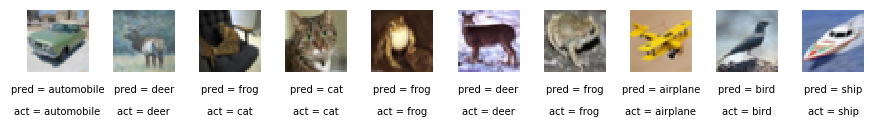

In [16]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)
